**Built on Google colab. Best viewed in the dark theme**

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [0]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

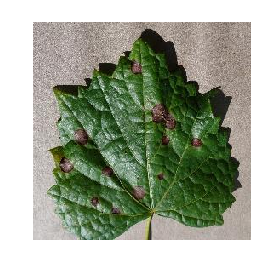

In [3]:
img = cv2.imread("/gdrive/My Drive/Capstone project images/color/Grape___Black_rot/00cab05d-e87b-4cf6-87d8-284f3ec99626___FAM_B.Rot 3244.JPG")
color=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(color)
plt.title('Color',color='w')
plt.axis('off')
plt.show()

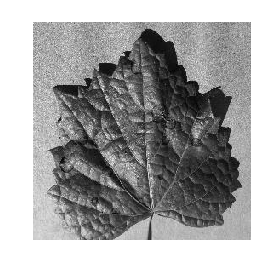

In [4]:
gray = cv2.cvtColor(color, cv2.COLOR_RGB2GRAY)
plt.imshow(gray,cmap='gray')
plt.title('Grayscale',color='w')
plt.axis('off')
plt.show()

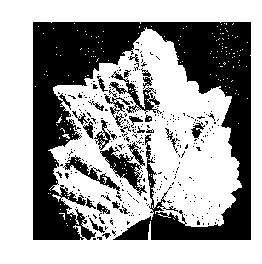

In [5]:
th, threshed = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV|cv2.THRESH_OTSU)
thresh=cv2.cvtColor(threshed, cv2.COLOR_GRAY2RGB)
plt.imshow(thresh)
plt.title('Threshold',color='w')
plt.axis('off')
plt.show()

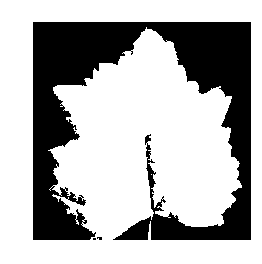

In [6]:
cnts = cv2.findContours(threshed, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[-2]
cnts = sorted(cnts, key=cv2.contourArea,reverse=True)
cnt=cnts[0]
mask = np.zeros(img.shape[:2],np.uint8)
masked=cv2.drawContours(mask, [cnt],-1, 255, -1)
plt.imshow(masked,cmap='gray')
plt.title('Masked',color='w')
plt.axis('off')
plt.show()

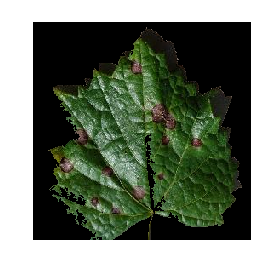

In [7]:
mask = np.zeros(img.shape[:2],np.uint8)
cv2.drawContours(mask, [cnt],-1, 255, -1)
dst = cv2.bitwise_and(img, img, mask=mask)
segmented=cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
plt.imshow(segmented)
plt.title('Segmented',color='w')
plt.axis('off')
plt.show()

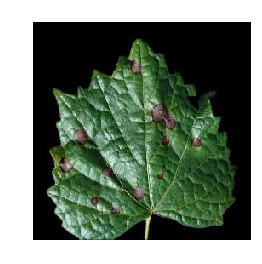

In [8]:
img1 = cv2.imread("/gdrive/My Drive/Capstone project images/segmented/Grape___Black_rot/00cab05d-e87b-4cf6-87d8-284f3ec99626___FAM_B.Rot 3244_final_masked.jpg")
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.title('Segmented available',color='w')
plt.axis('off')
plt.show()